In [ ]:
#Data Scrap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_excel('NaturalFlows1906-2019_20210420.xlsx',parse_dates=False)
years=list(df[df.columns[0]].astype(str))
years=years[4:-5]
flows=list(df[df.columns[20]])
flows=flows[4:-5]

ucrb_acre=157440000
ft_mm=304.8
flows=np.array(flows)/ucrb_acre*ft_mm

hydrology_monthly_flows={'year':years,'flow':flows}

[0.6164289983146045, 0.6527735353445827, 0.6900831195766308, 0.7304535422711358, 0.7662409422286273, 0.8081130291747771, 0.8339597935095158, 0.8128738967638531, 0.7569400691151033, 0.8129597323949368, 0.8268585639568595, 0.830915291074623, 0.8187371751622593, 0.8383317496534344, 0.8392056264211124, 0.8483263207995038, 0.8391423912408471, 0.844826612771537, 0.8613757059904026, 0.8555038680072963, 0.8713763784522568, 0.8943235367878044, 0.8925105748002101, 0.8953337579701284, 0.883060353235055, 0.8900015769046407, 0.8895680367873298, 0.8877410345327315, 0.8772826533182378, 0.8796149952812757, 0.8525520423567187, 0.8775274300253586, 0.9034077364769834, 0.9151788302727277, 0.9170787833790077, 0.9267079184647913, 0.9248903714467073, 0.9342001537474431, 0.9284518586984388, 0.9254822700888836, 0.9318229728824681, 0.9233792043541766, 0.9349427149324875, 0.9309853261299761, 0.9026227697116561, 0.6754142538176456, 0.610340241968075, 0.6137890016074553, 0.6586640909585963, 0.644321888661641]
0.79

<Axes: ylabel='Density'>

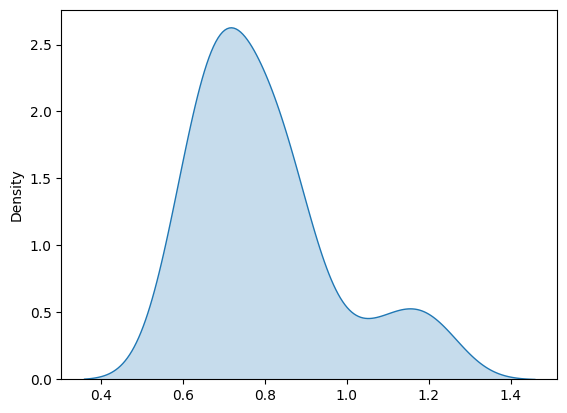

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

train_set=hydrology_monthly_flows['flow'][2:107*12+2]
test_set=hydrology_monthly_flows['flow'][107*12-24:113*12+2]
X_train=[train_set[i:i+24] for i in range(len(train_set)-48)]
y_train=[train_set[i:i+24] for i in range(24,len(train_set)-24)]

XTRIALS=[]
YTRIALS=[]
for j in range(50):
    X_test=[test_set[i:i+24] for i in range(len(test_set)-48)]
    y_test=[test_set[i:i+24] for i in range(24,len(test_set)-24)]

# print(len(train_set)/12)
# print((len(test_set)-2))
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train,y_train)
mse_total=[]
r2_total=[]
for i in range(len(y_test)):
    y_pred = rf_model.predict([X_test[i]])
    rmse = np.sqrt(mean_squared_error(y_test[i], y_pred[0]))
    mse_total.append(rmse)
    r2 = r2_score(y_test[i], y_pred[0])
    r2_total.append(r2)
print(r2_total)
print(np.average(mse_total))
    # print(f'Mean Squared Error: {mse}')
    # print(f'R^2 Score: {r2}')
print(np.median(r2_total))
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(mse_total,fill=True)


In [ ]:
#Try Annualizing the Data
train_set=hydrology_monthly_flows['flow'][2:107*12+2]
test_set=hydrology_monthly_flows['flow'][107*12-24:113*12+2]
X_train=[train_set[i:i+24] for i in range(len(train_set)-48)]
y_train=[train_set[i:i+24] for i in range(24,len(train_set)-24)]

XTRIALS=[]
YTRIALS=[]
for j in range(50):
    X_test=[test_set[i:i+24] for i in range(len(test_set)-48)]
    y_test=[test_set[i:i+24] for i in range(24,len(test_set)-24)]

print(len(train_set)/12)
print(len(test_set)/12)
print(len(X_train)/12)
print(len(y_train))
print(len(X_test))


107.0
8.166666666666666
103.0
1236
50


In [ ]:

flows=np.array(hydrology_monthly_flows['flow'])[:-3]
flows=[np.average(flows[int(i*12):int(i*12+12)]) for i in range(int(len(flows)/12))]
n=4
t=10
X_train=[flows[i:i+n] for i in range(len(flows)-2*n-t)]
y_train=[flows[i:i+n] for i in range(n,len(flows)-n-t)]
X_test=[flows[-t-n+i:-t+i] for i in range(t-n)]
y_test=[flows[-t+i:-t+i+n] for i in range(t-n)]
# print(len(flows))
# print(len(X_train))
# print(len(y_train))
# print(len(X_test))
# print(len(y_test))



rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train,y_train)
mse_total=[]
r2_total=[]
for i in range(len(y_test)):
    y_pred = rf_model.predict([X_test[i]])
    rmse = np.sqrt(mean_squared_error(y_test[i], y_pred[0]))

    mse_total.append(rmse)
    r2 = r2_score(y_test[i], y_pred[0])
    r2_total.append(r2)
print(np.average(mse_total))


0.5905039293252681


In [ ]:
df=pd.read_excel('LFnatFlow1906-2024.2024.9.12 (1).xlsx')## Matches the USBR site.
cols=df.columns
years=list(df[cols[0]].dropna())[:-2]
flows=list(df[cols[1]].dropna()[2:-2])
usbr_instrumental_flows={'year':years,'flow':flows}
len(usbr_instrumental_flows['flow'])

119

In [ ]:
df

Last Updated 9/12/2024                  Unnamed: 1
0                      NaN  WY Lees Ferry Natural Flow
1                      NaN                        (AF)
2                     1906                    18214678
3                     1907                    21234305
4                     1908                    11773952
..                     ...                         ...
120                   2024                    11875000
121                    NaN                         NaN
122      1906-2020 average             14737285.434783
123                    NaN                         NaN
124      1991-2020 average                  13494713.9

[125 rows x 2 columns]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('upper-colorado-recons - gage data.csv')
dataset=list(df['Unnamed: 10'])[3:]
dataset=[float(x) for x in dataset]
# print(dataset)


# add the reconstruction dataset
# df=pd.read_csv('upper-colorado-recons - Lees Ferry Reconstruction.csv')
# dataset=list(df['Lees-D (std/PCA)'])
# dataset=[float(x) for x in dataset]
##############################################################


flows=np.array(dataset)
n=4
t=10
print(len(flows))
X_train=[flows[i:i+n] for i in range(len(flows)-2*n-t)]
y_train=[flows[i:i+n] for i in range(n,len(flows)-n-t)]
X_test=[flows[-t-n+i:-t+i] for i in range(t-n)]
y_test=[flows[-t+i:-t+i+n] for i in range(t-n)]
# print(len(flows))
# print(len(X_train))
# print(len(y_train))
# print(len(X_test))
# print(len(y_test))



rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train,y_train)
mse_total=[]
r2_total=[]
for i in range(len(y_test)):
    y_pred = rf_model.predict([X_test[i]])
    rmse = np.sqrt(mean_squared_error(y_test[i], y_pred[0]))

    mse_total.append(rmse)
    r2 = r2_score(y_test[i], y_pred[0])
    r2_total.append(r2)
print(np.average(mse_total))

90
6070.1751621889025


In [ ]:
#lookback and look ahead window vari

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('upper-colorado-recons - gage data.csv')
dataset=list(df['Unnamed: 10'])[3:]
dataset=[float(x) for x in dataset]
# print(dataset)


# add the reconstruction dataset
df=pd.read_csv('upper-colorado-recons - Lees Ferry Reconstruction.csv')
dataset=list(df['Lees-D (std/PCA)'])
dataset=[float(x) for x in dataset]
##############################################################


def window_tester(flows,b,f,t):


    flows=np.array(flows)
    n=len(flows)


    X_train=[flows[i:i+b] for i in range(n-b-f-t)]
    y_train=[flows[i:i+f] for i in range(b,n-f-t)]
    X_test=[flows[-t-b+i:-t+i] for i in range(t-f)]
    y_test=[flows[-t+i:-t+i+f] for i in range(t-f)]




    rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
    rf_model.fit(X_train,y_train)
    mse_total=[]
    r2_total=[]
    for i in range(len(y_test)):
        y_pred = rf_model.predict([X_test[i]])
        rmse = np.sqrt(mean_squared_error(y_test[i], y_pred[0]))

        mse_total.append(rmse)
        r2 = r2_score(y_test[i], y_pred[0])
        r2_total.append(r2)
    return np.average(mse_total)
for i in range(2,10):
    for j in range(2,6):
        for k in range(8,12):
            print('lookback: ',i,'   lookahead:  ',j,'  t: ',k, '    MSE: ',window_tester(dataset,i,j,k))
# I choose b=4, f=2, t=8

lookback:  2    lookahead:   2   t:  8     MSE:  4741.498208498214
lookback:  2    lookahead:   2   t:  9     MSE:  4515.894181863296
lookback:  2    lookahead:   2   t:  10     MSE:  4574.084592472025
lookback:  2    lookahead:   2   t:  11     MSE:  4415.3607629513035
lookback:  2    lookahead:   3   t:  8     MSE:  4463.491325772547
lookback:  2    lookahead:   3   t:  9     MSE:  4150.1595943153725
lookback:  2    lookahead:   3   t:  10     MSE:  4268.838870865341
lookback:  2    lookahead:   3   t:  11     MSE:  4332.408448135454
lookback:  2    lookahead:   4   t:  8     MSE:  3670.5598350817218
lookback:  2    lookahead:   4   t:  9     MSE:  3439.9844710751545
lookback:  2    lookahead:   4   t:  10     MSE:  3648.5944250121047
lookback:  2    lookahead:   4   t:  11     MSE:  3799.7717650547856
lookback:  2    lookahead:   5   t:  8     MSE:  4057.01412390583
lookback:  2    lookahead:   5   t:  9     MSE:  3675.2364717352184
lookback:  2    lookahead:   5   t:  10     MSE:  

In [ ]:
#big 4 accuracy test
#lookback and look ahead window vari

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('upper-colorado-recons - gage data.csv')
dataset=list(df['Unnamed: 10'])[3:]
dataset=[float(x) for x in dataset]
# print(dataset)


# add the reconstruction dataset
df=pd.read_csv('upper-colorado-recons - Lees Ferry Reconstruction.csv')
dataset=list(df['Lees-D (std/PCA)'])
dataset=[float(x) for x in dataset]
def window_tester(flows,b,f,t):


    flows=np.array(flows)
    n=len(flows)


    X_train=[flows[i:i+b] for i in range(n-b-f-t)]
    y_train=[flows[i:i+f] for i in range(b,n-f-t)]
    X_test=[flows[-t-b+i:-t+i] for i in range(t-f)]
    y_test=[flows[-t+i:-t+i+f] for i in range(t-f)]




    rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
    rf_model.fit(X_train,y_train)
    mse_total=[]
    r2_total=[]
    for i in range(len(y_test)):
        y_pred = rf_model.predict([X_test[i]])
        rmse = np.sqrt(mean_squared_error(y_test[i], y_pred[0]))

        mse_total.append(rmse)
        r2 = r2_score(y_test[i], y_pred[0])
        r2_total.append(r2)
    return np.average(mse_total)


def nash_sutcliffe_efficiency(observed, predicted):
    """
    Compute the Nash-Sutcliffe Efficiency (NSE).

    Parameters:
    observed (array-like): Observed values.
    predicted (array-like): Predicted values.

    Returns:
    float: Nash-Sutcliffe Efficiency (NSE).
    """
    observed = np.array(observed)
    predicted = np.array(predicted)

    numerator = np.sum((observed - predicted) ** 2)
    denominator = np.sum((observed - np.mean(observed)) ** 2)

    return 1 - (numerator / denominator)


def kling_gupta_efficiency(observed, predicted):
    """
    Compute the Kling-Gupta Efficiency (KGE).

    Parameters:
    observed (array-like): Observed values.
    predicted (array-like): Predicted values.

    Returns:
    float: Kling-Gupta Efficiency (KGE).
    """
    observed = np.array(observed)
    predicted = np.array(predicted)

    # Calculate components
    r = np.corrcoef(observed, predicted)[0, 1]  # Correlation coefficient
    beta = np.mean(predicted) / np.mean(observed)  # Bias ratio
    gamma = (np.std(predicted) / np.mean(predicted)) / (np.std(observed) / np.mean(observed))  # Variability ratio

    # KGE formula
    kge = 1 - np.sqrt((r - 1) ** 2 + (beta - 1) ** 2 + (gamma - 1) ** 2)
    return kge
window_tester(dataset,4,2,8)

3618.5540892481827

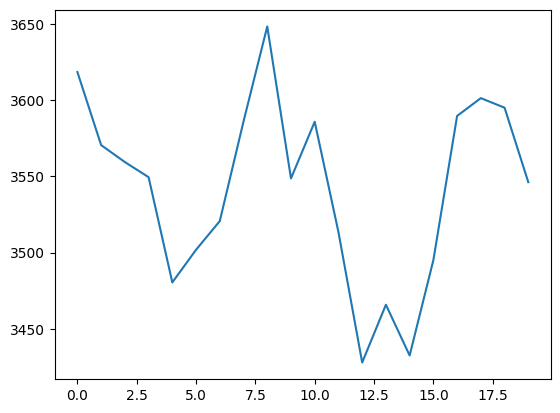

In [ ]:
def window_tester(flows,b,f,t):


    flows=np.array(flows)
    n=len(flows)


    X_train=[flows[i:i+b] for i in range(n-b-f-t)]
    y_train=[flows[i:i+f] for i in range(b,n-f-t)]
    X_test=[flows[-t-b+i:-t+i] for i in range(t-f)]
    y_test=[flows[-t+i:-t+i+f] for i in range(t-f)]




    rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
    rf_model.fit(X_train,y_train)
    mse_total=[]
    r2_total=[]
    for i in range(len(y_test)):
        y_pred = rf_model.predict([X_test[i]])
        rmse = np.sqrt(mean_squared_error(y_test[i], y_pred[0]))

        mse_total.append(rmse)
        r2 = r2_score(y_test[i], y_pred[0])
        r2_total.append(r2)
    return np.average(mse_total)

mse=[]
for i in range(20):
    mse.append(window_tester(dataset[i*2:],4,2,8))

plt.plot(range(20),mse)
plt.show()

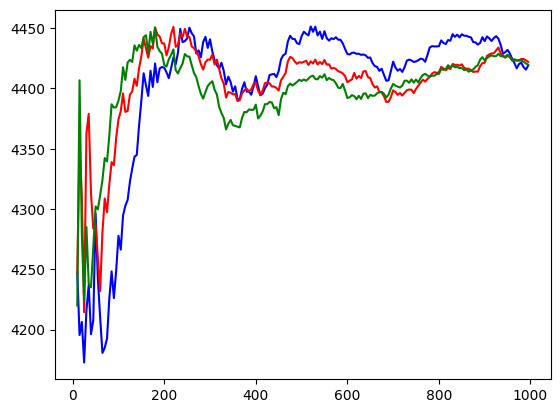

In [1]:
#RFR Parameter Check

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('upper-colorado-recons - gage data.csv')
dataset=list(df['Unnamed: 10'])[3:]
dataset=[float(x) for x in dataset]
# print(dataset)


# add the reconstruction dataset
df=pd.read_csv('upper-colorado-recons - Lees Ferry Reconstruction.csv')
dataset=list(df['Lees-D (std/PCA)'])
dataset=[float(x) for x in dataset]
##############################################################


def window_tester(flows,b,f,t,rfr_estim=1000,minsamp=1):


    flows=np.array(flows)
    n=len(flows)


    X_train=[flows[i:i+b] for i in range(n-b-f-t)]
    y_train=[flows[i:i+f] for i in range(b,n-f-t)]
    X_test=[flows[-t-b+i:-t+i] for i in range(t-f)]
    y_test=[flows[-t+i:-t+i+f] for i in range(t-f)]




    rf_model = RandomForestRegressor(n_estimators=rfr_estim, random_state=42,min_samples_leaf=minsamp)
    rf_model.fit(X_train,y_train)
    mse_total=[]
    r2_total=[]
    for i in range(len(y_test)):
        y_pred = rf_model.predict([X_test[i]])
        rmse = np.sqrt(mean_squared_error(y_test[i], y_pred[0]))

        mse_total.append(rmse)
        r2 = r2_score(y_test[i], y_pred[0])
        r2_total.append(r2)
    return np.average(mse_total)

lis=[]
geegee=[]
tres=[]
for i in np.arange(10,1000,5):
    lis.append(window_tester(dataset,6,3,15,int(i),1))
    geegee.append(window_tester(dataset,6,3,15,int(i),2))
    tres.append(window_tester(dataset,6,3,15,int(i),3))
    
plt.plot(np.arange(10,1000,5),lis,color='b')
plt.plot(np.arange(10,1000,5),geegee,color='r')
plt.plot(np.arange(10,1000,5),tres,color='g')




In [5]:
#RFR Parameter Check

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('upper-colorado-recons - gage data.csv')
dataset=list(df['Unnamed: 10'])[3:]
dataset=[float(x) for x in dataset]
# print(dataset)


# add the reconstruction dataset
df=pd.read_csv('upper-colorado-recons - Lees Ferry Reconstruction.csv')
dataset=list(df['Lees-D (std/PCA)'])
dataset=[float(x) for x in dataset]
##############################################################


def window_tester(flows,b,f,t,rfr_estim=1000,minsamp=1):


    flows=np.array(flows)
    n=len(flows)


    X_train=[flows[i:i+b] for i in range(n-b-f-t)]
    y_train=[flows[i:i+f] for i in range(b,n-f-t)]
    X_test=[flows[-t-b+i:-t+i] for i in range(t-f)]
    y_test=[flows[-t+i:-t+i+f] for i in range(t-f)]




    rf_model = RandomForestRegressor(n_estimators=rfr_estim, random_state=42,min_samples_leaf=minsamp)
    rf_model.fit(X_train,y_train)
    mse_total=[]
    r2_total=[]
    for i in range(len(y_test)):
        y_pred = rf_model.predict([X_test[i]])
        rmse = np.sqrt(mean_squared_error(y_test[i], y_pred[0]))

        mse_total.append(rmse)
        r2 = r2_score(y_test[i], y_pred[0])
        r2_total.append(r2)
    return np.average(mse_total)

window_tester(dataset,6,3,15,45,1)




4207.782082541254

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Example data
streamflow = [100, 110, 120, 130, 125, 115, 105, 95, 90, 85, 80, 75, 70, 65, 60, 55]
temperature = [15, 14.5, 14.8, 15.2, 15.5, 15.7, 15.3, 14.9, 14.4, 14.2, 13.8, 13.5, 13.2, 13.0, 12.7, 12.5]

# Function to create the multivariate dataset with proper structure
def create_multivariate_dataset_refined(streamflow, temperature, input_years=6, target_years=4):
    X, y = [], []
    total_years = len(streamflow)
    
    for start in range(total_years - (input_years + target_years) + 1):
        # Streamflow input (6 years)
        sf_input = streamflow[start:start+input_years]
        # Temperature input (6 years)
        temp_input = temperature[start:start+input_years]
        
        # Combine as separate features (2 columns per year)
        features = sf_input + temp_input  # Keep them separate in the final matrix
        print('hiya',features)
        # Target: 4 years of future streamflow
        sf_target = streamflow[start+input_years:start+input_years+target_years]

        X.append(features)
        y.append(sf_target)
    
    return np.array(X), np.array(y)

# Generate the refined input-output pairs
X, y = create_multivariate_dataset_refined(streamflow, temperature)

# Convert to DataFrame for readability
num_input_years = 6
feature_columns = [f"streamflow_t-{i}" for i in range(num_input_years, 0, -1)] + \
                  [f"temperature_t-{i}" for i in range(num_input_years, 0, -1)]

X_df = pd.DataFrame(X, columns=feature_columns)
y_df = pd.DataFrame(y, columns=[f"streamflow_t+{i}" for i in range(1, 5)])

print("Feature Matrix (X):")
print(X_df.head())

print("\nTarget Matrix (y):")
print(y_df.head())

hiya [100, 110, 120, 130, 125, 115, 15, 14.5, 14.8, 15.2, 15.5, 15.7]
hiya [110, 120, 130, 125, 115, 105, 14.5, 14.8, 15.2, 15.5, 15.7, 15.3]
hiya [120, 130, 125, 115, 105, 95, 14.8, 15.2, 15.5, 15.7, 15.3, 14.9]
hiya [130, 125, 115, 105, 95, 90, 15.2, 15.5, 15.7, 15.3, 14.9, 14.4]
hiya [125, 115, 105, 95, 90, 85, 15.5, 15.7, 15.3, 14.9, 14.4, 14.2]
hiya [115, 105, 95, 90, 85, 80, 15.7, 15.3, 14.9, 14.4, 14.2, 13.8]
hiya [105, 95, 90, 85, 80, 75, 15.3, 14.9, 14.4, 14.2, 13.8, 13.5]
Feature Matrix (X):
   streamflow_t-6  streamflow_t-5  streamflow_t-4  streamflow_t-3  \
0           100.0           110.0           120.0           130.0   
1           110.0           120.0           130.0           125.0   
2           120.0           130.0           125.0           115.0   
3           130.0           125.0           115.0           105.0   
4           125.0           115.0           105.0            95.0   

   streamflow_t-2  streamflow_t-1  temperature_t-6  temperature_t-5  \
0      

Text(0.5, 0, 'Estimators')

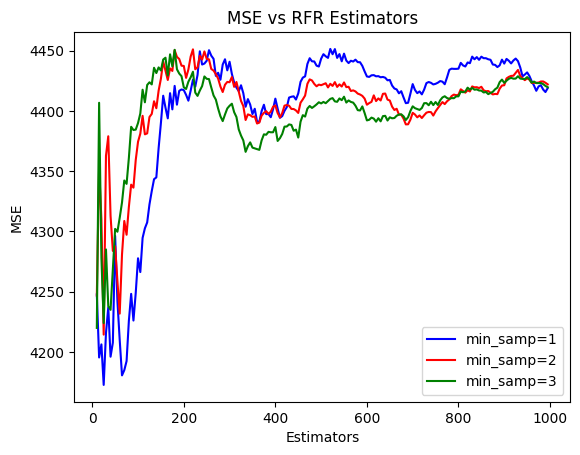

In [4]:
plt.plot(np.arange(10,1000,5),lis,color='b',label='min_samp=1')
plt.plot(np.arange(10,1000,5),geegee,color='r',label='min_samp=2')
plt.plot(np.arange(10,1000,5),tres,color='g',label='min_samp=3')
plt.legend()
plt.title('MSE vs RFR Estimators')
plt.ylabel('MSE')
plt.xlabel('Estimators')

446 446


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


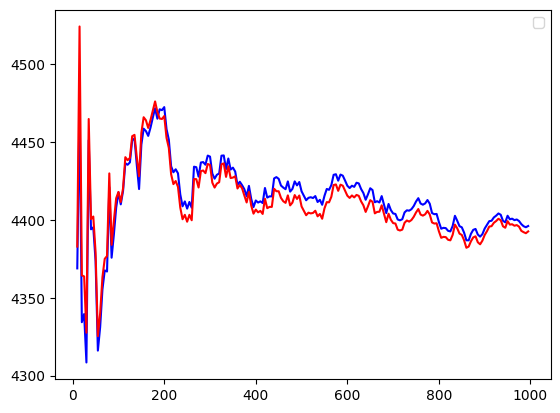

In [1]:
#RFR Parameter Check

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('upper-colorado-recons - gage data.csv')
dataset=list(df['Unnamed: 10'])[3:]
dataset=[float(x) for x in dataset]
# print(dataset)


# add the reconstruction dataset
df=pd.read_csv('upper-colorado-recons - Lees Ferry Reconstruction.csv')
dataset=list(df['Lees-D (std/PCA)']) #1490-1998
dataset=[float(x) for x in dataset]

with open('avg_ucrb_temps.txt','r') as f:
    temps=[float(line.strip()) for line in f] #1553-2020

dataset=dataset[1553-1490:]
temps=temps[:-(2020-1998)]
print(len(dataset),len(temps))
##############################################################


def window_tester(flows,b,f,t,rfr_estim=1000,minsamp=1, temps=False,tempdata=None):


    flows=np.array(flows)
    n=len(flows)


    X_train=[flows[i:i+b] for i in range(n-b-f-t)]
    y_train=[flows[i:i+f] for i in range(b,n-f-t)]
    X_test=[flows[-t-b+i:-t+i] for i in range(t-f)]
    y_test=[flows[-t+i:-t+i+f] for i in range(t-f)]


    if temps==True:
        X_train=[flows[i:i+b]+tempdata[i:i+b] for i in range(n-b-f-t)]
        X_test=[flows[-t-b+i:-t+i]+tempdata[-t-b+i:-t+i] for i in range(t-f)]


    rf_model = RandomForestRegressor(n_estimators=rfr_estim, random_state=42,min_samples_leaf=minsamp)
    rf_model.fit(X_train,y_train)
    mse_total=[]
    r2_total=[]
    for i in range(len(y_test)):
        y_pred = rf_model.predict([X_test[i]])
        rmse = np.sqrt(mean_squared_error(y_test[i], y_pred[0]))

        mse_total.append(rmse)
        r2 = r2_score(y_test[i], y_pred[0])
        r2_total.append(r2)
    return np.average(mse_total)

lis=[]
tis=[]


for i in np.arange(10,1000,5):
    lis.append(window_tester(dataset,6,3,15,int(i),1))
    tis.append(window_tester(dataset,6,3,15,int(i),1,temps=True,tempdata=temps))
    
plt.plot(np.arange(10,1000,5),lis,color='b')
plt.plot(np.arange(10,1000,5),tis,color='r')
plt.legend()







446 446


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


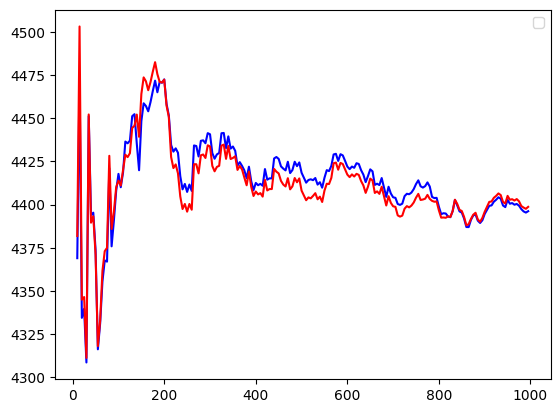

In [2]:
#RFR Parameter Check

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df=pd.read_csv('upper-colorado-recons - gage data.csv')
dataset=list(df['Unnamed: 10'])[3:]
dataset=[float(x) for x in dataset]
# print(dataset)


# add the reconstruction dataset
df=pd.read_csv('upper-colorado-recons - Lees Ferry Reconstruction.csv')
dataset=list(df['Lees-D (std/PCA)']) #1490-1998
dataset=[float(x) for x in dataset]

with open('./github/datafiles/avg_ucrb_temp_patched.txt','r') as f:
    temps=[float(line.strip()) for line in f] #1553-2020

dataset=dataset[1553-1490:]
temps=temps[:-(2020-1998)]
print(len(dataset),len(temps))
##############################################################


def window_tester(flows,b,f,t,rfr_estim=1000,minsamp=1, temps=False,tempdata=None):


    flows=np.array(flows)
    n=len(flows)


    X_train=[flows[i:i+b] for i in range(n-b-f-t)]
    y_train=[flows[i:i+f] for i in range(b,n-f-t)]
    X_test=[flows[-t-b+i:-t+i] for i in range(t-f)]
    y_test=[flows[-t+i:-t+i+f] for i in range(t-f)]


    if temps==True:
        X_train=[flows[i:i+b]+tempdata[i:i+b] for i in range(n-b-f-t)]
        X_test=[flows[-t-b+i:-t+i]+tempdata[-t-b+i:-t+i] for i in range(t-f)]


    rf_model = RandomForestRegressor(n_estimators=rfr_estim, random_state=42,min_samples_leaf=minsamp)
    rf_model.fit(X_train,y_train)
    mse_total=[]
    r2_total=[]
    for i in range(len(y_test)):
        y_pred = rf_model.predict([X_test[i]])
        rmse = np.sqrt(mean_squared_error(y_test[i], y_pred[0]))

        mse_total.append(rmse)
        r2 = r2_score(y_test[i], y_pred[0])
        r2_total.append(r2)
    return np.average(mse_total)

lis=[]
tis=[]


for i in np.arange(10,1000,5):
    lis.append(window_tester(dataset,6,3,15,int(i),1))
    tis.append(window_tester(dataset,6,3,15,int(i),1,temps=True,tempdata=temps))
    
plt.plot(np.arange(10,1000,5),lis,color='b')
plt.plot(np.arange(10,1000,5),tis,color='r')
plt.legend()





